In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('canada_per_capita_income.csv')
df.head()

C:\Users\gowri\AppData\Local\Temp\ipykernel_3220\2945879465.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [2]:
df.rename(columns = {'per capita income (US$)':'per_capita'}, inplace = True)

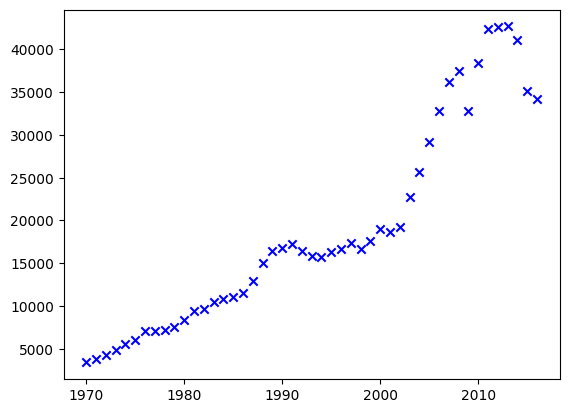

In [4]:
plt.scatter(df['year'],df['per_capita'],marker='x',color='blue')
plt.show()

m and b after gradient descent are  11163.070758216958 18794.24306587718


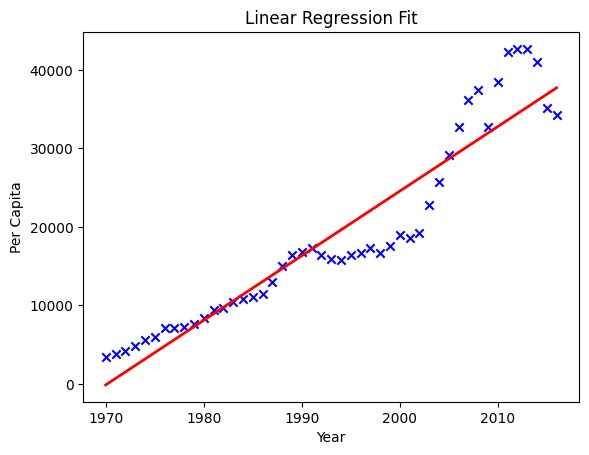

In [43]:
##implementation from scratch
from sklearn.preprocessing import StandardScaler

# Standardize the 'year' values to prevent any out of range errors
scaler = StandardScaler()
df['year_scaled'] = scaler.fit_transform(df[['year']])

def cost_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].year_scaled
        y = points.iloc[i].per_capita
        total_error += ((m * x + b) - y) ** 2
    total_error = total_error / (len(points) * 2)
    return total_error

def gradient_descent(m, b, alpha, points):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].year_scaled
        y = points.iloc[i].per_capita
        m_gradient += ((m * x + b - y) * x) / n
        b_gradient += (m * x + b - y) / n
    
    m -= alpha * m_gradient
    b -= alpha * b_gradient

    return m, b

# Initialize parameters
m = 0
b = 0
iterations = 1000
alpha = 0.005

# Perform gradient descent
for i in range(iterations):
    m, b = gradient_descent(m, b, alpha, df)

print("m and b after gradient descent are ", m, b)

# Plotting
plt.scatter(df['year'], df['per_capita'], marker='x', color='blue')

predicted_y = [m * x + b for x in df['year_scaled']]
plt.plot(df['year'], predicted_y, color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Linear Regression Fit')
plt.show()


In [39]:
##Implementation using inbuilt library
from sklearn import linear_model
import numpy as np
regress= linear_model.LinearRegression()
year= np.array(df['year']).reshape(-1,1)  ##converting to numpy 2d array
regress.fit(year,df['per_capita'])

LinearRegression()

slope is  [828.46507522]
y intercept is -1632210.7578554575


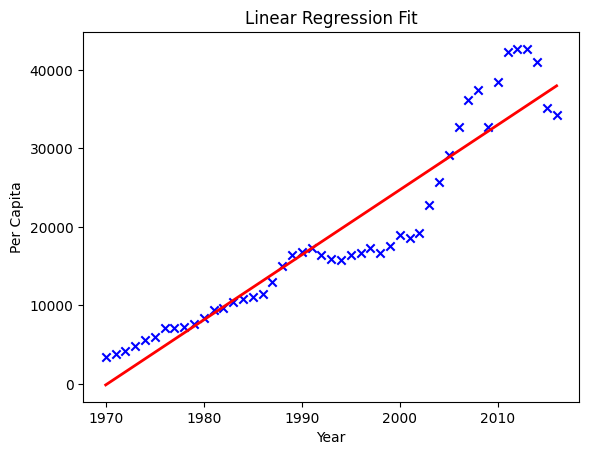

In [41]:
print('slope is ',regress.coef_)
print('y intercept is',regress.intercept_)
plt.scatter(df['year'], df['per_capita'], marker='x', color='blue')
plt.plot(df['year'], regress.predict(year), color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Linear Regression Fit')
plt.show()